In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
import pickle
import random
from shutil import copyfile
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    dataset = []
    
    for unitData in os.listdir(SOURCE):
        data = SOURCE + unitData
        if(os.path.getsize(data) > 0):
            dataset.append(unitData)
        else:
            print('Skipped ' + unitData)
            print('Invalid file i.e zero size')
    
    train_set_length = int(len(dataset) * SPLIT_SIZE)
    test_set_length = int(len(dataset) - train_set_length)
    shuffled_set = random.sample(dataset, len(dataset))
    train_set = dataset[0:train_set_length]
    test_set = dataset[-test_set_length:]
       
    for unitData in train_set:
        temp_train_set = SOURCE + unitData
        final_train_set = TRAINING + unitData
        copyfile(temp_train_set, final_train_set)
    
    for unitData in test_set:
        temp_test_set = SOURCE + unitData
        final_test_set = TESTING + unitData
        copyfile(temp_test_set, final_test_set)
        
        
MALIGNANT_SOURCE_DIR = "/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Breast-Cancer-Prediction-using-Deep-Learning/dataset/malignant/"
TRAINING_MALIGNANT_DIR = "/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Breast-Cancer-Prediction-using-Deep-Learning/dataset/train/malignant/"
TESTING_MALIGNANT_DIR = "/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Breast-Cancer-Prediction-using-Deep-Learning/dataset/test/malignant/"
BENIGN_SOURCE_DIR = "/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Breast-Cancer-Prediction-using-Deep-Learning/dataset/benign/"
TRAINING_BENIGN_DIR = "/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Breast-Cancer-Prediction-using-Deep-Learning/dataset/train/benign/"
TESTING_BENIGN_DIR = "/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Breast-Cancer-Prediction-using-Deep-Learning/dataset/test/benign/"
split_size = .8
split_data(MALIGNANT_SOURCE_DIR, TRAINING_MALIGNANT_DIR, TESTING_MALIGNANT_DIR, split_size)
split_data(BENIGN_SOURCE_DIR, TRAINING_BENIGN_DIR, TESTING_BENIGN_DIR, split_size)

In [2]:
print("Training set with malignant cells",len(os.listdir('/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Breast-Cancer-Prediction-using-Deep-Learning/dataset/train/malignant/')))

print("Training set with benign cells",len(os.listdir('/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Breast-Cancer-Prediction-using-Deep-Learning/dataset/train/benign/')))

print("Test set with malignant cells",len(os.listdir('/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Breast-Cancer-Prediction-using-Deep-Learning/dataset/test/malignant/')))

print("Test set with benign cells",len(os.listdir('/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Breast-Cancer-Prediction-using-Deep-Learning/dataset/test/benign/')))

Training set with malignant cells 12313
Training set with benign cells 12075
Test set with malignant cells 3079
Test set with benign cells 3019


In [3]:
train_data = ImageDataGenerator(rescale=1/255)
test_data = ImageDataGenerator(rescale=1/255)

In [4]:
train_datagen = train_data.flow_from_directory("/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Breast-Cancer-Prediction-using-Deep-Learning/dataset/train",
                                              target_size=(150,150), batch_size=32, class_mode='binary')

test_datagen = test_data.flow_from_directory("/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Breast-Cancer-Prediction-using-Deep-Learning/dataset/test",
                                              target_size=(150,150), batch_size=32, class_mode='binary')

Found 24388 images belonging to 2 classes.
Found 6098 images belonging to 2 classes.


In [5]:
test_datagen.class_indices

{'benign': 0, 'malignant': 1}

In [6]:
# Creating the Image Classification CNN Model

model = keras.Sequential()

#Covolution layer and Max Pool layer 1
model.add(keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

#Covolution layer and Max Pool layer 2
model.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

#Covolution layer and Max Pool layer 3
model.add(keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

#Covolution layer and Max Pool layer 4
model.add(keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

#Covolution layer and Max Pool layer 5
model.add(keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))


#Converting the multidimensional image data array into 1d array
model.add(keras.layers.Flatten())

# Hidden layer with 2048 neurons and Rectified Linear Unit activation function 
# Fully connected layer to increase the accuracy
model.add(keras.layers.Dense(2048,activation='relu'))

# Output layer with single neuron which gives 0 for benign or 1 for malignant 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid')) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [8]:
# Defining the optimizer and the loss function. 
model.compile(optimizer=Adam(lr=0.00001),loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
# Training the Model

model.fit_generator(train_datagen, 
                    epochs = 20,
                    validation_data = test_datagen)

Epoch 1/20
763/763 [==============================] - 295s 387ms/step - loss: 0.6307 - acc: 0.6434 - val_loss: 0.5441 - val_acc: 0.7463
Epoch 2/20
763/763 [==============================] - 311s 407ms/step - loss: 0.5335 - acc: 0.7559 - val_loss: 0.5381 - val_acc: 0.7430
Epoch 3/20
763/763 [==============================] - 717s 940ms/step - loss: 0.5161 - acc: 0.7672 - val_loss: 0.5124 - val_acc: 0.7684
Epoch 4/20
763/763 [==============================] - 334s 437ms/step - loss: 0.5102 - acc: 0.7704 - val_loss: 0.5213 - val_acc: 0.7591
Epoch 5/20
763/763 [==============================] - 343s 450ms/step - loss: 0.5039 - acc: 0.7714 - val_loss: 0.5023 - val_acc: 0.7739
Epoch 6/20
763/763 [==============================] - 344s 451ms/step - loss: 0.4990 - acc: 0.7735 - val_loss: 0.5237 - val_acc: 0.7558
Epoch 7/20
763/763 [==============================] - 346s 453ms/step - loss: 0.4944 - acc: 0.7771 - val_loss: 0.5097 - val_acc: 0.7657
Epoch 8/20
763/763 [============================

In [36]:
# Training summary of the model
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


AttributeError: 'Sequential' object has no attribute 'history'

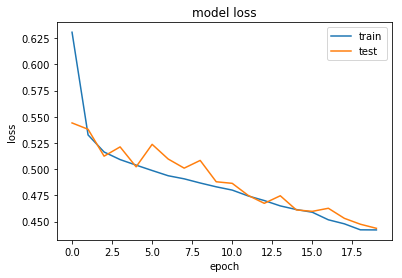

In [13]:
# Loss summary of the model
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [37]:
# Saving the Trained Model
model.save('trained_model.h5')

In [9]:
# Loading the trained model
loaded_model = tf.keras.models.load_model('trained_model.h5')

loss,acc = loaded_model.evaluate(test_datagen)
print('Trained model accuracy {:5.2f}%'.format(100 * acc))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
191/191 [==============================] - 16s 85ms/step - loss: 0.6928 - acc: 0.5095
Trained model accuracy 50.95%


In [10]:
## Using the Model to make Predictions

def predictImage(filepath):
    
    img1 = image.load_img(filepath, target_size = (150,150))
    
    plt.imshow(img1)
    
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y, axis=0)
    
    result = loaded_model.predict(X)
    
    print(result)
        
    if result >= 0.5:
        
        print('Prediction: The cell in the image is malignant or IDC positive')
        
    
    elif result < 0.5:
        
        print('Prediction: The cell in the image is benign or IDC negative')

In [11]:
# Making Predictions of random images

[[0.499796]]
Prediction: The cell in the image is benign or IDC negative


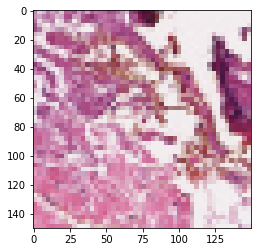

In [61]:
predictImage(r"/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Breast-Cancer-Prediction-using-Deep-Learning/sample-biopsy-images/6.png")